In [1]:
import torch
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pkbar
import time
import warnings
warnings.filterwarnings('ignore')

from VRL import *

In [2]:
# initialize parameters

s, a = 25, 4
k, gamma, chi = 3, 0.8, 50
R, R_vec = initialize_R(s, a)
P, P_mat = initialize_P(s, a)
five_tuple = s, a, P_mat, R_vec, gamma

In [3]:
# explore the environment

omega = explore_env(1500, k, R, P, s, a)

In [4]:
# build the model

H, cores, data, error = build_network(five_tuple, k, chi, omega)

initialize H, k=1
100/100  [==============================] - 0.1s
initialize H, k=2
100/100  [==============================] - 0.2s
initialize H, k=3
100/100  [==============================] - 15.8s


In [5]:
# train the model

spin, energy_history = VRL_train(five_tuple, k, data, cores, lr=0.0001, epochs=10000)

progress
10000/10000  [==============================] - 78.0s


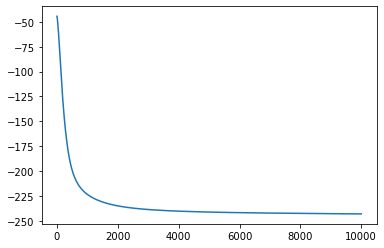

In [6]:
# visualize the energy minimiation process

plt.plot(energy_history)

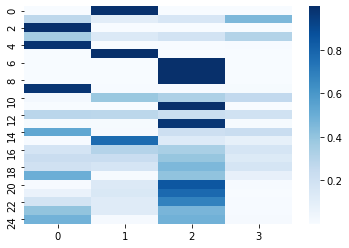

tensor([[1., 3., 0., 0., 0.],
        [1., 2., 2., 2., 0.],
        [1., 2., 0., 2., 0.],
        [1., 2., 2., 2., 0.],
        [2., 2., 2., 2., 2.]])

In [7]:
# retrieve the resulting policy

result = spin[0].data.reshape(s, a).detach().numpy()
ax = sns.heatmap(result, cmap="Blues")
plt.xlabel = 'States'
plt.show()

policy = torch.empty(s)
p = torch.tensor(result)
for i in range(s):
    policy[i] = torch.argmax(p[i, :])
policy.reshape(5, 5)